In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing

import numpy as np
import pandas as pd

%matplotlib inline  

---
### Read patient data 

In [87]:
data_file = os.path.abspath('../../phd_v2/data/all_data.csv')
df_old = utils.read_csv(data_file)
df_old

,subject_id,Short_Survival,Diagnosis_Delay,Age_Range_at_Onset,Riluzole,Sex_Male,Site_Onset,FVC,BMI,Q1_Speech_slope,...,Q7_Turning_in_Bed_slope,Q8_Walking_slope,Q9_Climbing_Stairs_slope,Q10_Respiratory_slope,Qty_Regions_Involved,Region_Involved_Bulbar,Region_Involved_Upper_Limb,Region_Involved_Lower_Limb,Region_Involved_Respiratory,Patient_with_Gastrostomy
0,329,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.50,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0
1,533,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.50,0.5,...,0.0,0.0,0.0,0.0,0.75,1.0,0.0,1.0,1.0,0.0
2,708,0.0,1.0,0.25,0.0,1.0,0.0,0.0,0.50,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0
3,1736,0.0,1.0,0.00,0.0,1.0,1.0,0.0,1.00,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0
4,1835,0.0,1.0,0.75,1.0,1.0,1.0,0.0,0.50,0.0,...,0.0,0.0,0.0,0.0,0.50,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,998019,1.0,1.0,0.50,0.0,1.0,0.0,1.0,0.75,0.5,...,0.5,1.0,1.0,0.5,1.00,1.0,1.0,1.0,1.0,0.0
1963,998519,0.0,1.0,0.25,0.0,0.0,1.0,0.0,0.50,0.0,...,0.0,0.0,0.5,0.0,0.50,0.0,1.0,1.0,0.0,0.0
1964,998542,1.0,1.0,1.00,0.0,1.0,1.0,0.0,0.75,0.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
1965,999166,0.0,0.0,0.50,0.0,1.0,0.0,0.0,0.75,0.0,...,0.0,0.0,0.0,0.0,0.50,1.0,0.0,1.0,0.0,0.0


In [11]:
#set the data directory
data_dir = os.path.abspath('../04_data_to_analyze/')
    
#read original values
data_file = f'{data_dir}/patient_preprocessed.csv'
df = utils.read_csv(data_file)

#read coded values
data_file = f'{data_dir}/patient_preprocessed_coded.csv'
df_coded = utils.read_csv(data_file)

#read scaled coded values
data_file = f'{data_dir}/patient_preprocessed_scaled.csv'
df_scaled = utils.read_csv(data_file)

dfs = [
    [df, 'Original'],
    [df_coded, 'Coded'],
    [df_scaled, 'Scaled']
]

display(df.head())
display(df_coded.head())
display(df_scaled.head())




,Sex,Site_Onset,Diagnosis_Delay,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,...,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis,Survival_Group
0,Female,Limb/Spinal,21.0,0-39,False,101.0,21.0,0.00,0.01,0.00,...,0.02,0.02,0.01,4.0,1.0,1.0,1.0,1.0,0.0,Non-Short
1,Female,Bulbar,32.0,60-69,False,80.0,22.0,0.09,0.06,0.06,...,0.03,0.03,0.03,3.0,1.0,0.0,1.0,1.0,0.0,Non-Short
2,Male,Bulbar,2.0,40-49,False,51.0,19.0,0.00,0.00,0.00,...,0.00,0.00,0.00,4.0,1.0,1.0,1.0,1.0,0.0,Non-Short
3,Male,Limb/Spinal,2.0,0-39,False,83.0,42.0,0.01,0.00,0.01,...,0.02,0.02,0.01,4.0,1.0,1.0,1.0,1.0,0.0,Non-Short
4,Male,Limb/Spinal,6.0,60-69,True,88.0,24.0,0.00,0.00,0.00,...,0.00,0.00,0.02,2.0,0.0,1.0,0.0,1.0,0.0,Non-Short


,Sex_Male,Site_Onset,Diagnosis_Delay,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,...,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis,Survival_Group
0,0,1,2,0,0,0,1,0,0,0,...,0,0,0,4,1,1,1,1,0,0
1,0,0,2,3,0,0,1,1,1,1,...,0,0,0,3,1,0,1,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,0,4,1,1,1,1,0,0
3,1,1,0,0,0,0,3,0,0,0,...,0,0,0,4,1,1,1,1,0,0
4,1,1,0,3,1,0,1,0,0,0,...,0,0,0,2,0,1,0,1,0,0


,Sex_Male,Site_Onset,Diagnosis_Delay,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,...,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis,Survival_Group
0,0.0,1.0,1.0,0.00,0.0,0.0,0.33,0.0,0.0,0.0,...,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.75,0.0,0.0,0.33,0.5,0.5,0.5,...,0.0,0.0,0.0,0.67,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.25,0.0,1.0,0.33,0.0,0.0,0.0,...,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.75,1.0,0.0,0.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.33,0.0,1.0,0.0,1.0,0.0,0.0


# Plot variable distributions

Column Sex  (1967 rows)   (DataType: object)


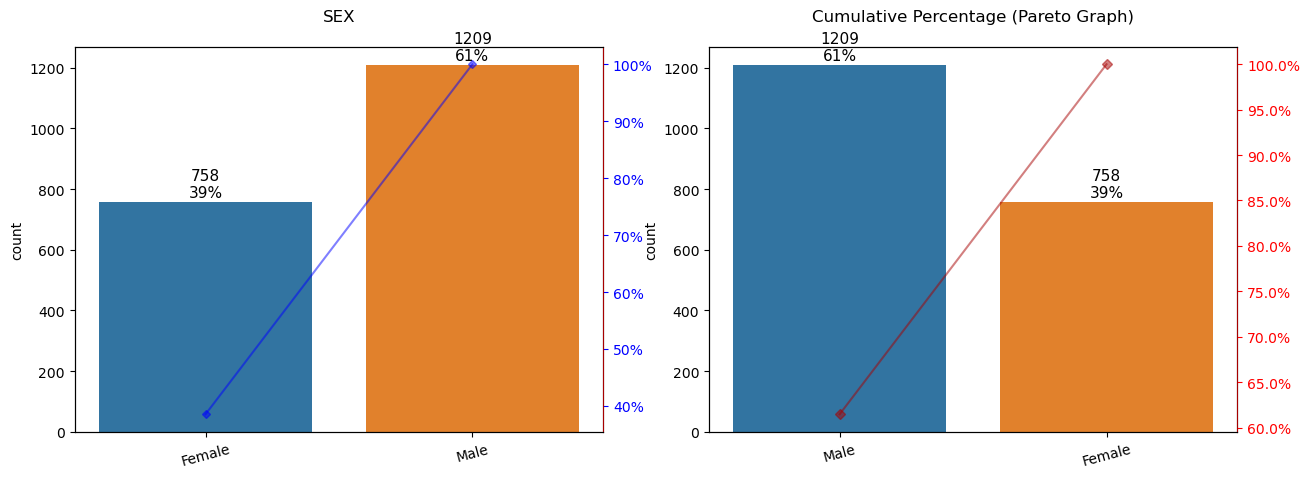

Column Site_Onset  (1967 rows)   (DataType: object)


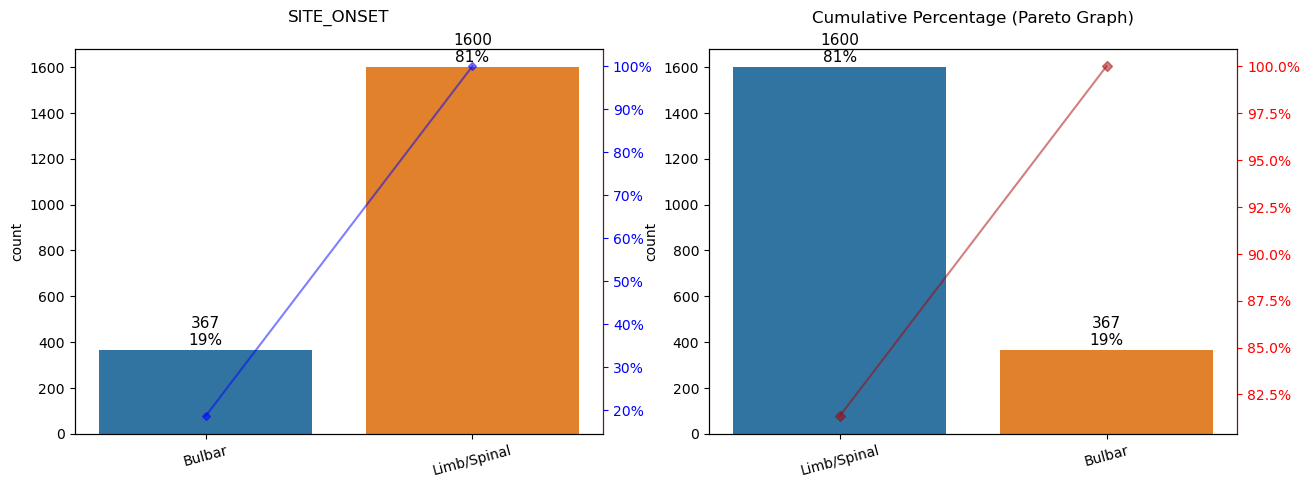

Column Diagnosis_Delay  (1967 rows)   (DataType: object)


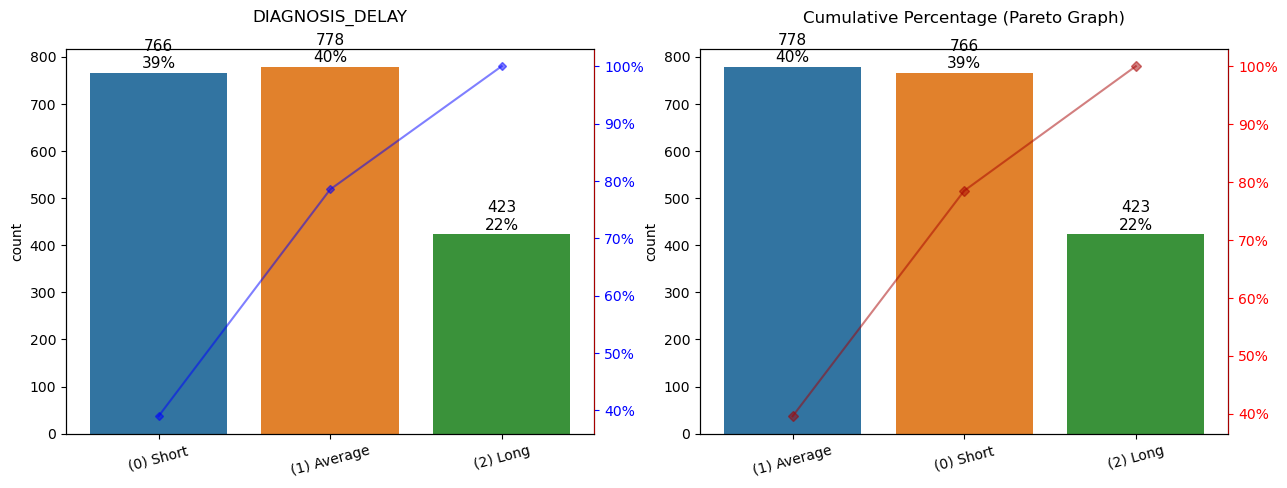

Column Age_at_Onset  (1967 rows)   (DataType: object)


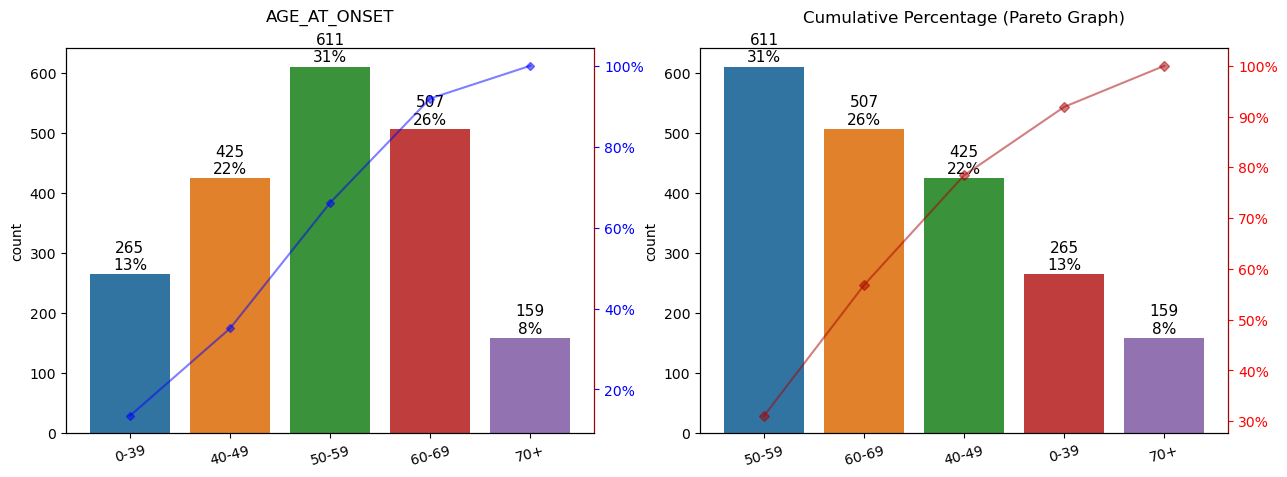

Column Riluzole  (1967 rows)   (DataType: object)


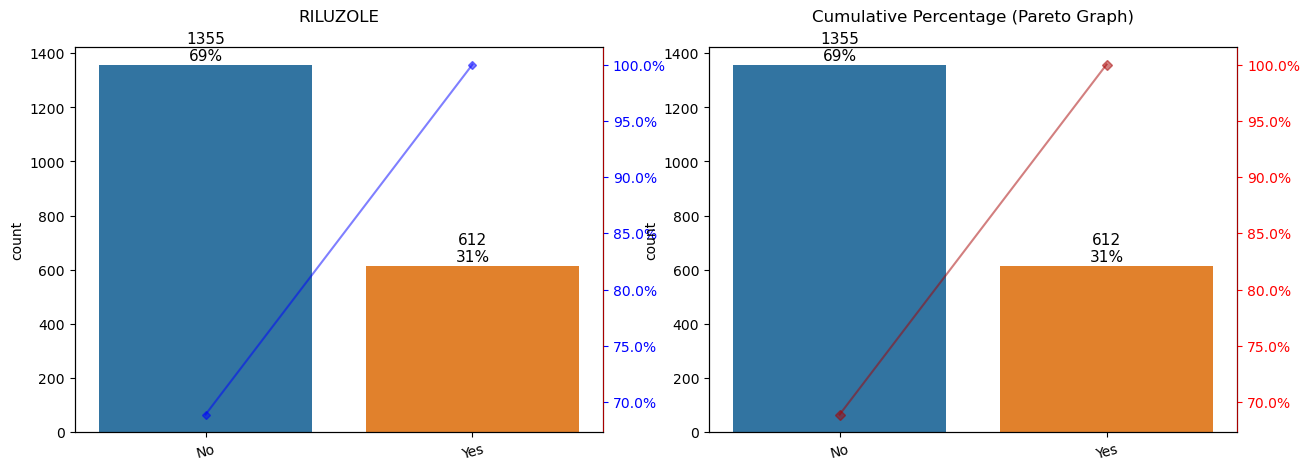

Column FVC_at_Diagnosis  (1967 rows)   (DataType: object)


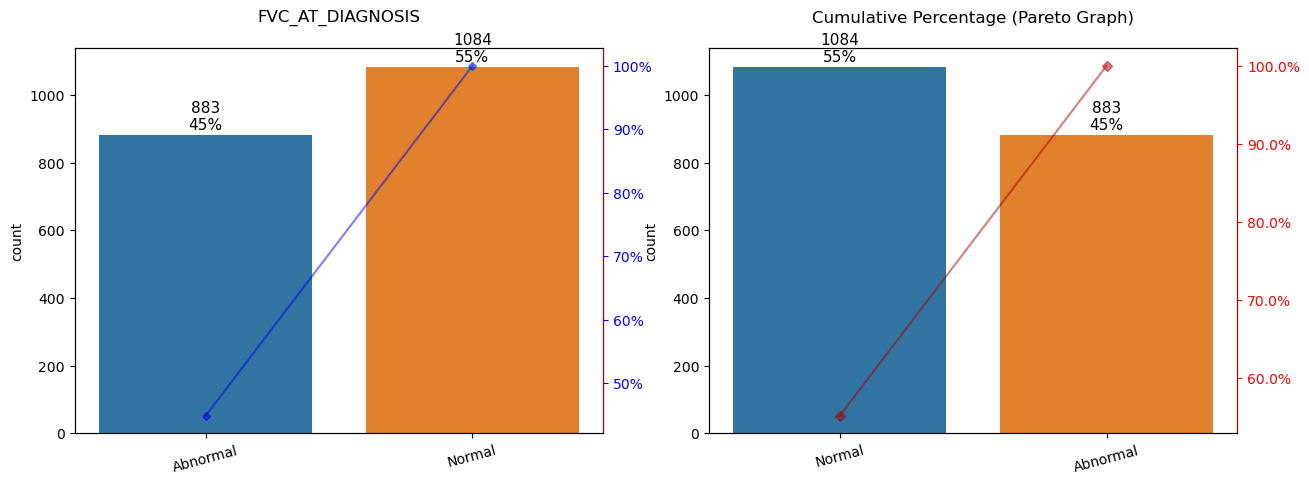

Column BMI_at_Diagnosis  (1967 rows)   (DataType: object)


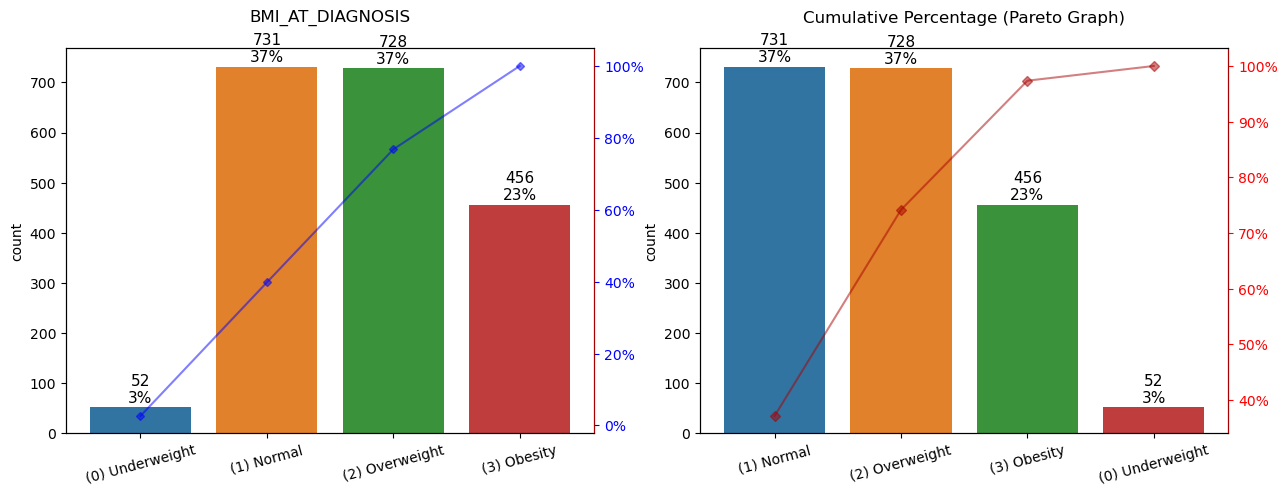

Column Q1_Speech_slope_at_Diagnosis  (1967 rows)   (DataType: object)


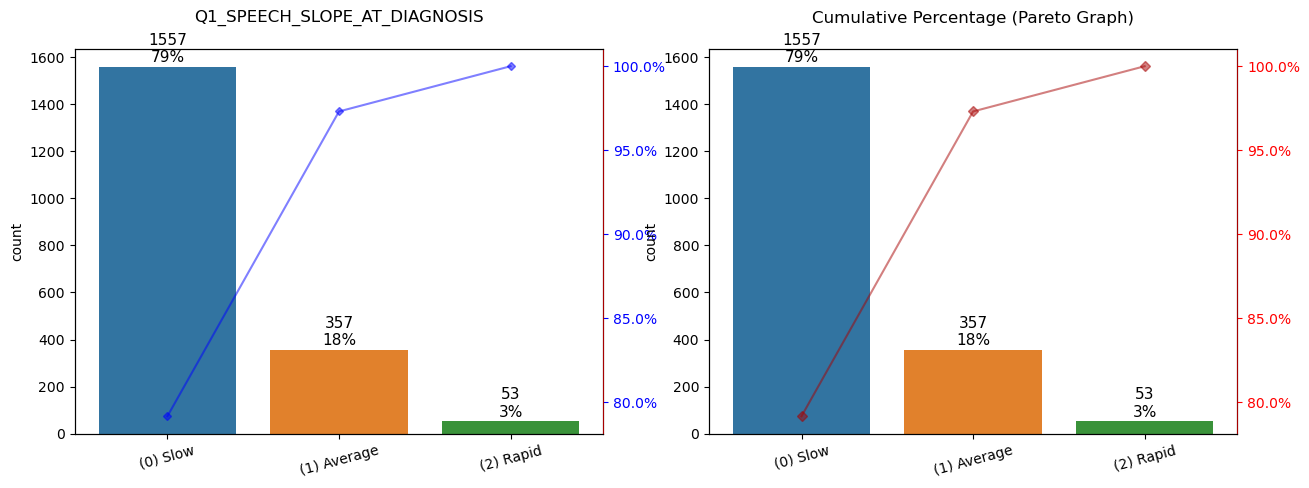

Column Q2_Salivation_slope_at_Diagnosis  (1967 rows)   (DataType: object)


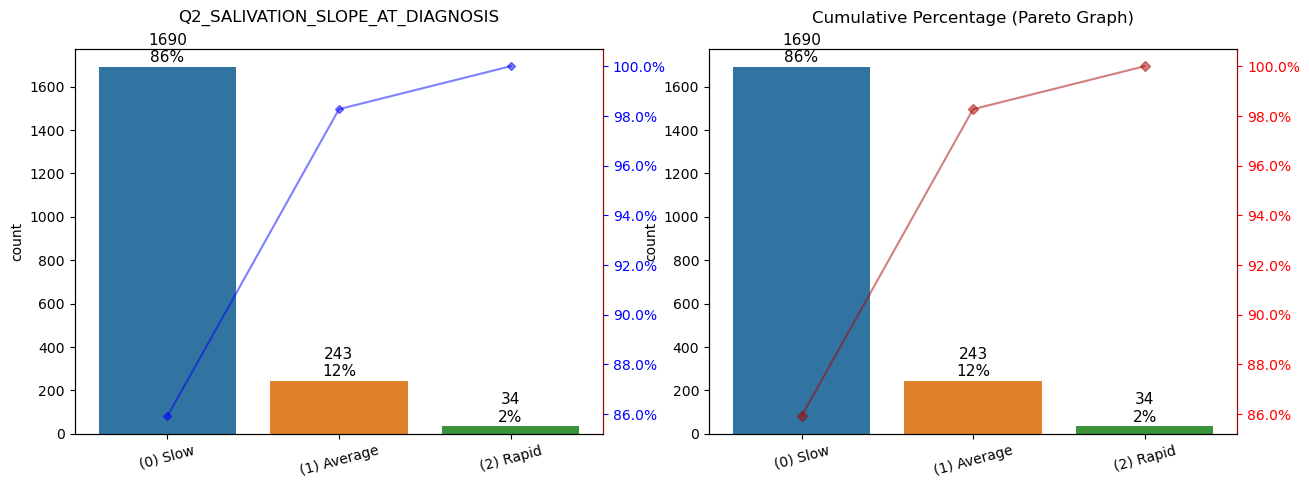

Column Q3_Swallowing_slope_at_Diagnosis  (1967 rows)   (DataType: object)


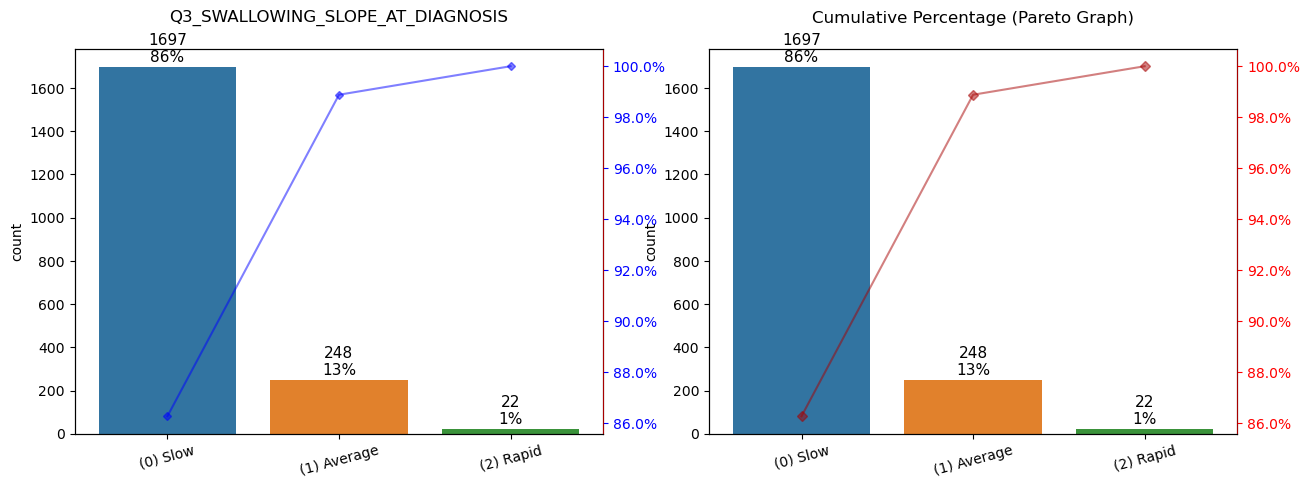

Column Q4_Handwriting_slope_at_Diagnosis  (1967 rows)   (DataType: object)


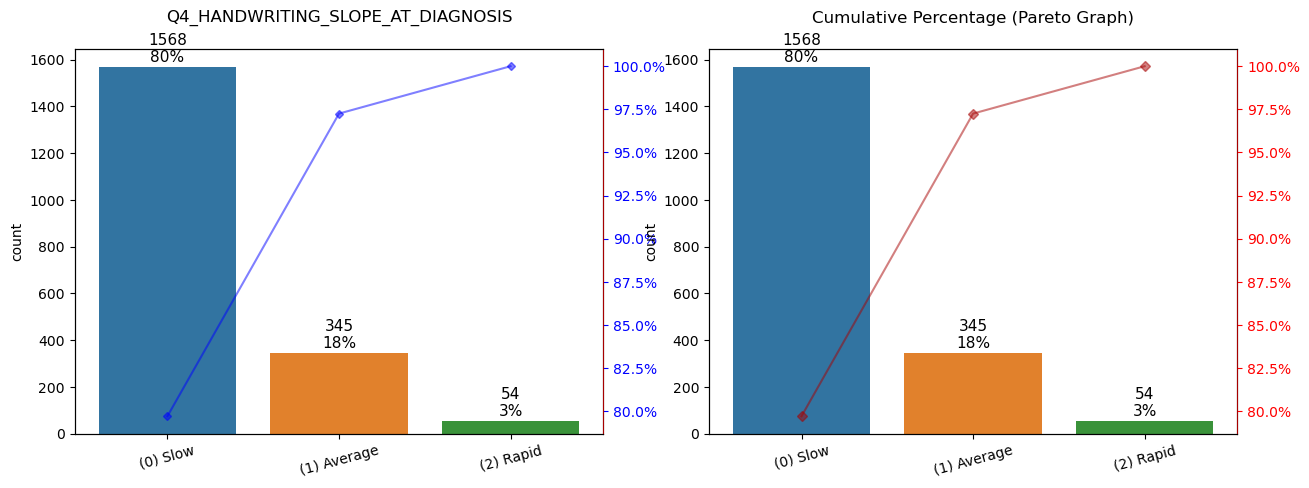

Column Q5_Cutting_slope_at_Diagnosis  (1967 rows)   (DataType: object)


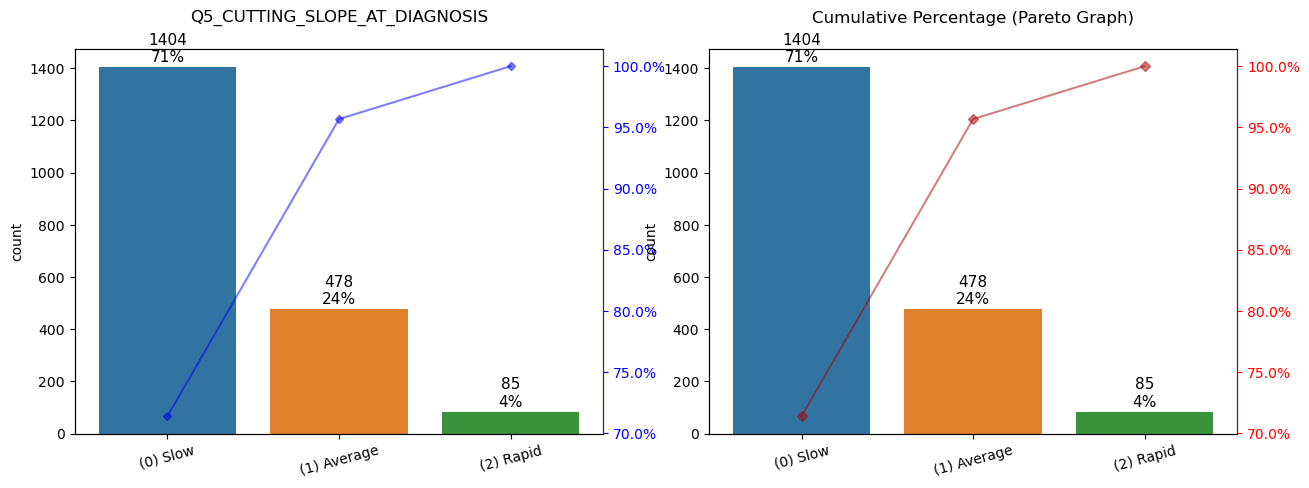

Column Q6_Dressing_and_Hygiene_slope_at_Diagnosis  (1967 rows)   (DataType: object)


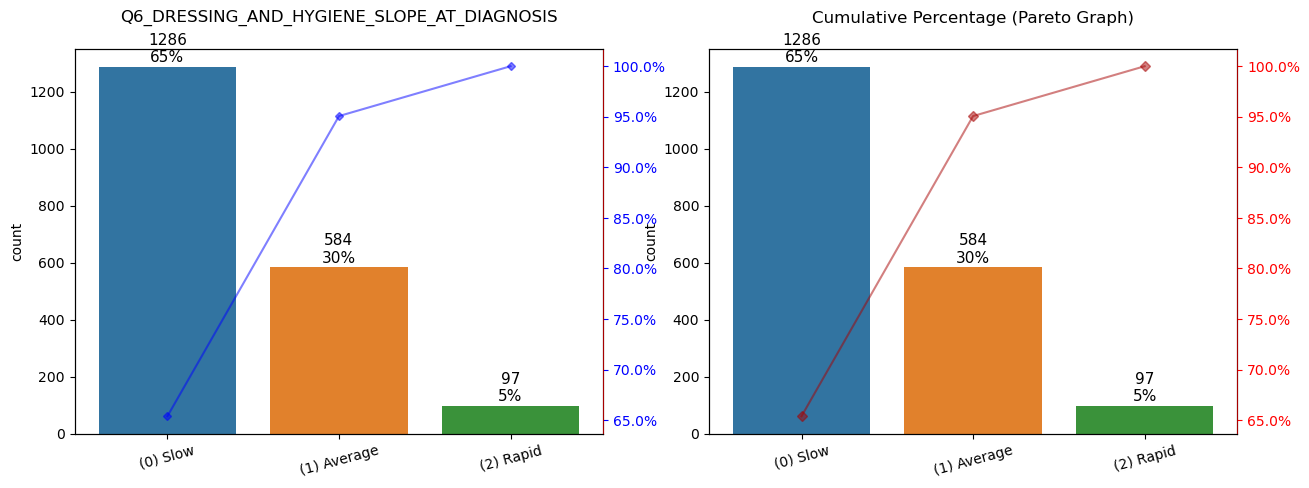

Column Q7_Turning_in_Bed_slope_at_Diagnosis  (1967 rows)   (DataType: object)


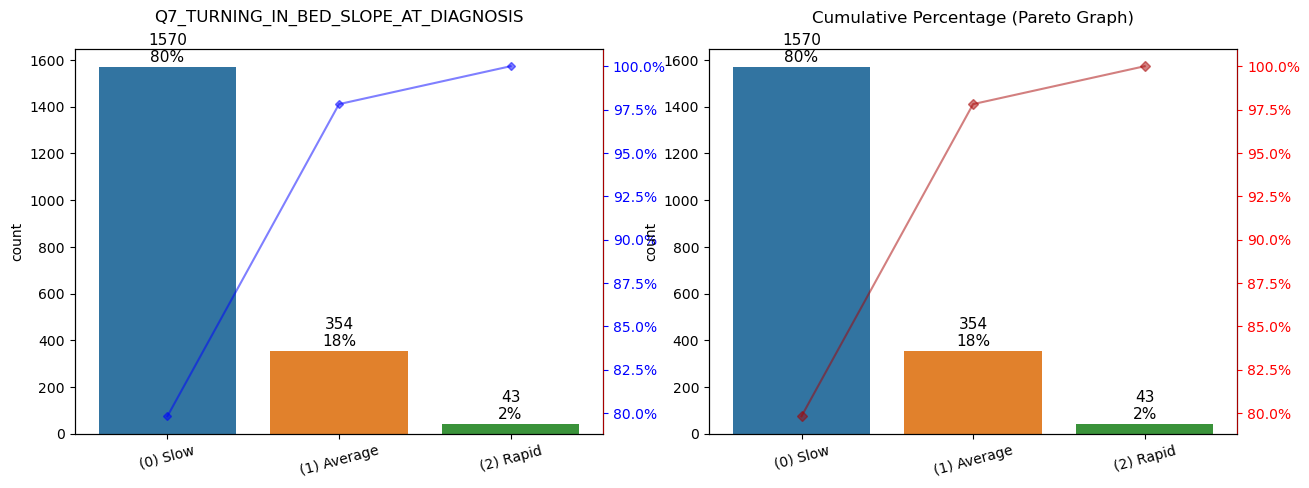

Column Q8_Walking_slope_at_Diagnosis  (1967 rows)   (DataType: object)


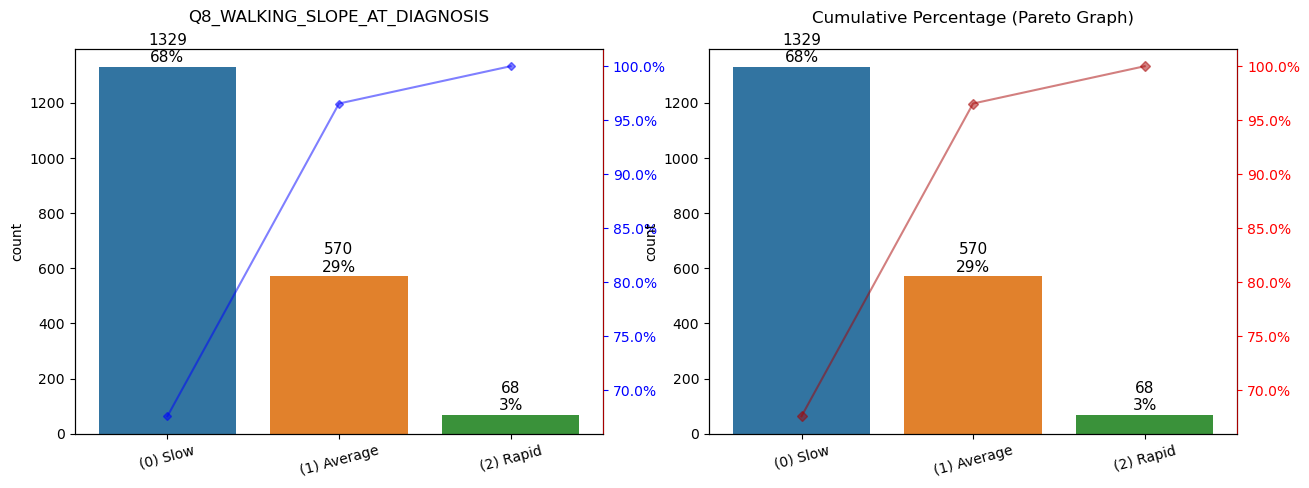

Column Q9_Climbing_Stairs_slope_at_Diagnosis  (1967 rows)   (DataType: object)


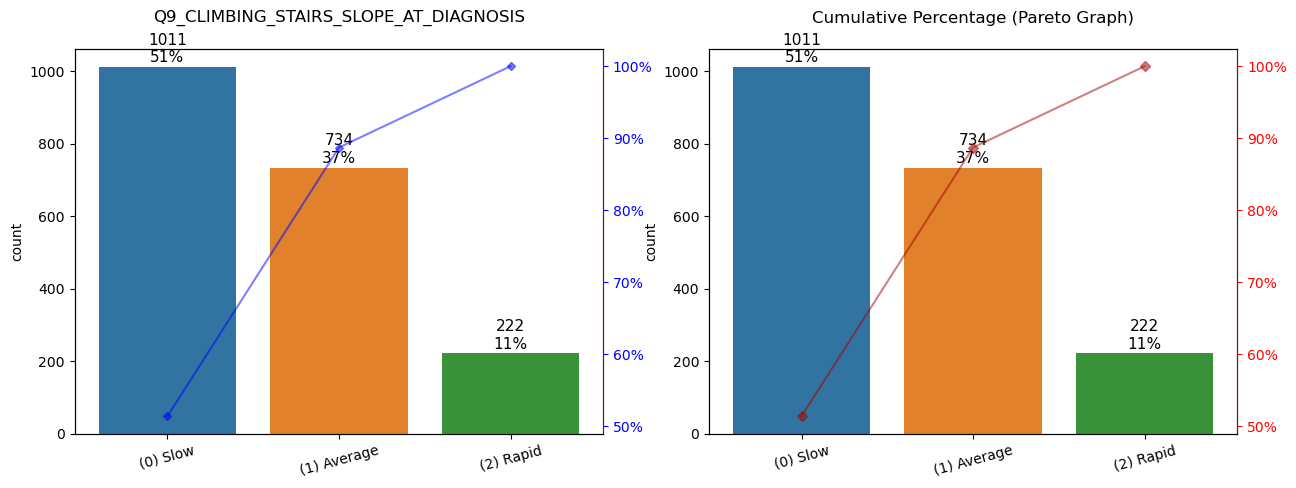

Column Q10_Respiratory_slope_at_Diagnosis  (1967 rows)   (DataType: object)


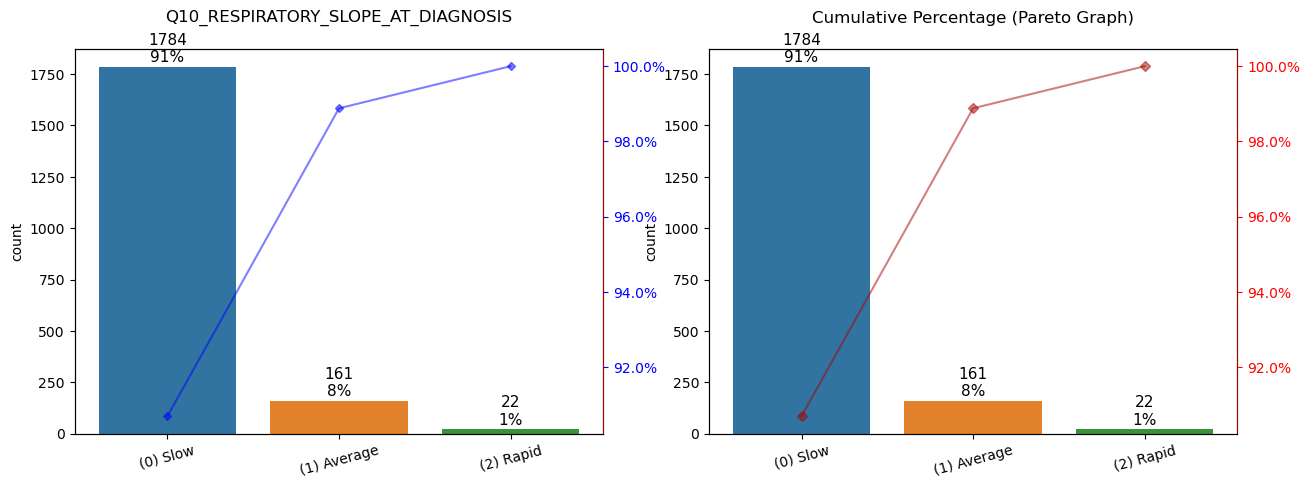

Column Qty_Regions_Involved_at_Diagnosis  (1967 rows)   (DataType: object)


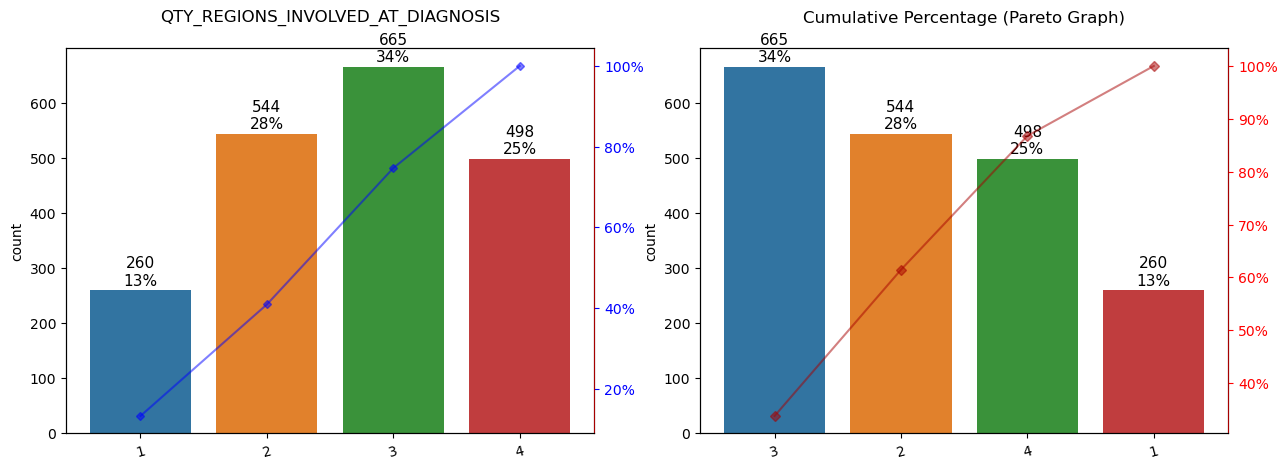

Column Region_Involved_Bulbar_at_Diagnosis  (1967 rows)   (DataType: object)


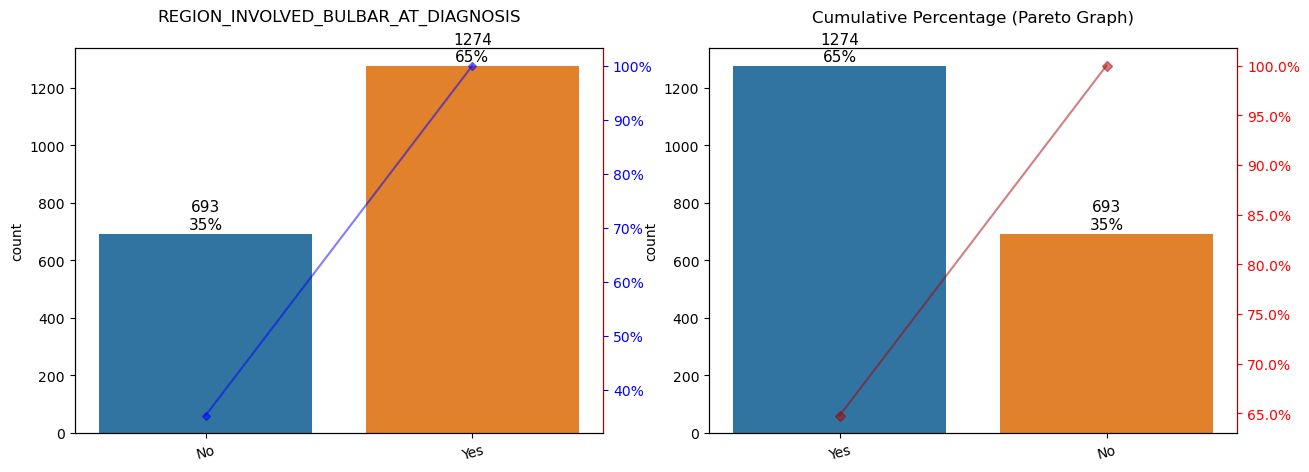

Column Region_Involved_Upper_Limb_at_Diagnosis  (1967 rows)   (DataType: object)


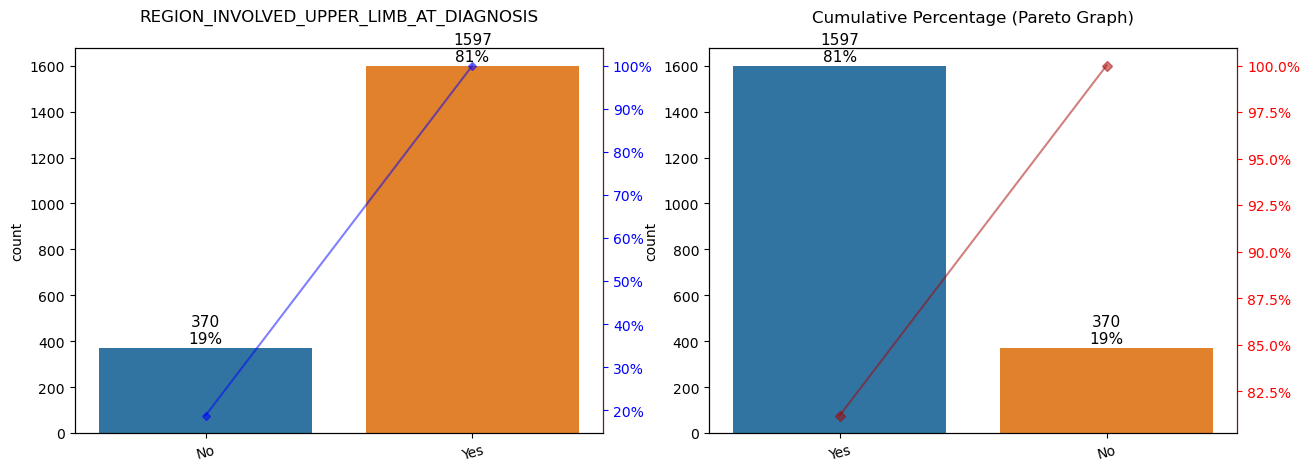

Column Region_Involved_Lower_Limb_at_Diagnosis  (1967 rows)   (DataType: object)


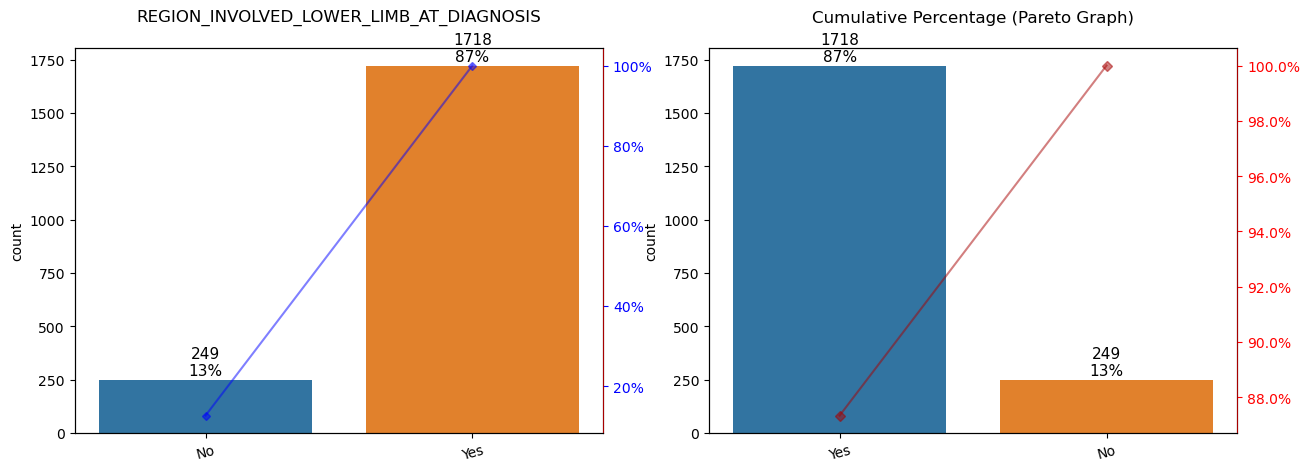

Column Region_Involved_Respiratory_at_Diagnosis  (1967 rows)   (DataType: object)


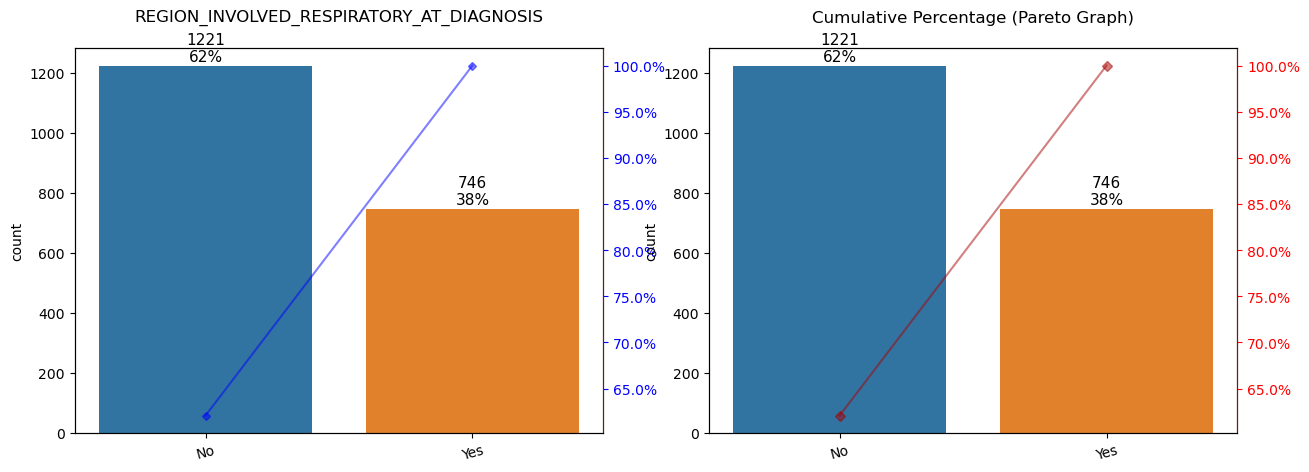

Column Patient_with_Gastrostomy_at_Diagnosis  (1967 rows)   (DataType: object)


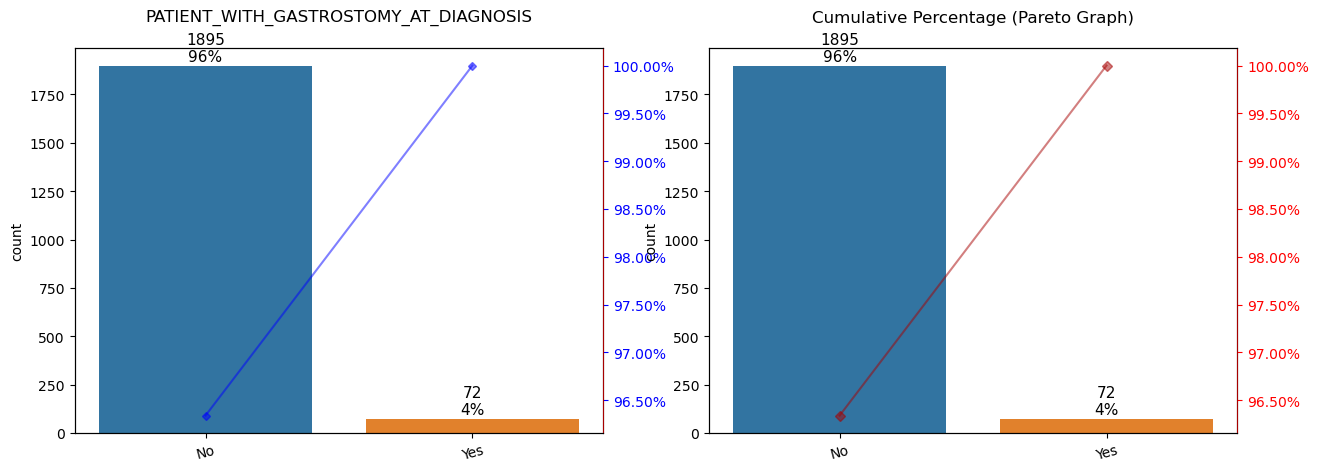

Column Survival_Group  (1967 rows)   (DataType: object)


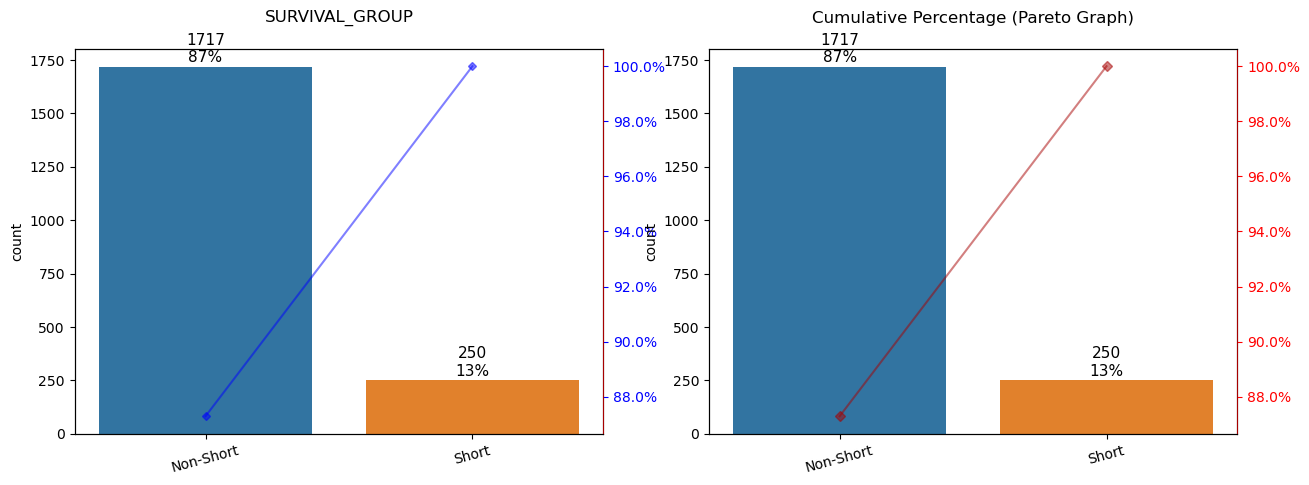

In [127]:
df_temp = utils.get_decoded_data(
    df_scaled, 
    add_coded_value=True,
)


utils.plot_variables_distributions(
    df=df_temp, 
    print_more_info=False,
)

# Compare the variable distributions for the 2 Survival Groups: $Short$ and $Non\_Short$

Column Sex     (DataType: object)


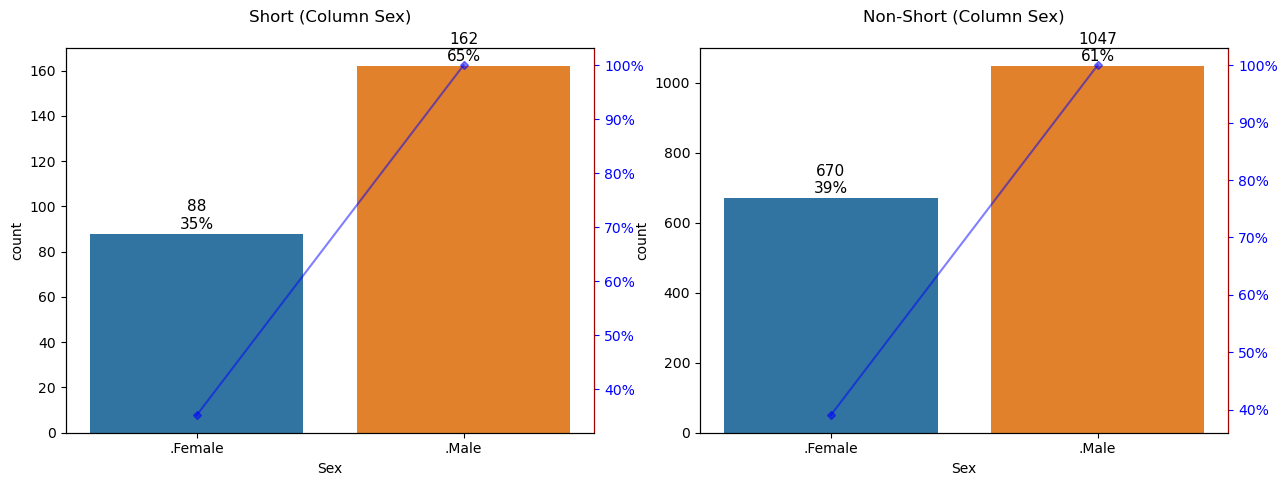

   Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
1  Female         88.0      35.20%            670.0          39.02%
0    Male        162.0      64.80%           1047.0          60.98%

Column Site_Onset     (DataType: object)


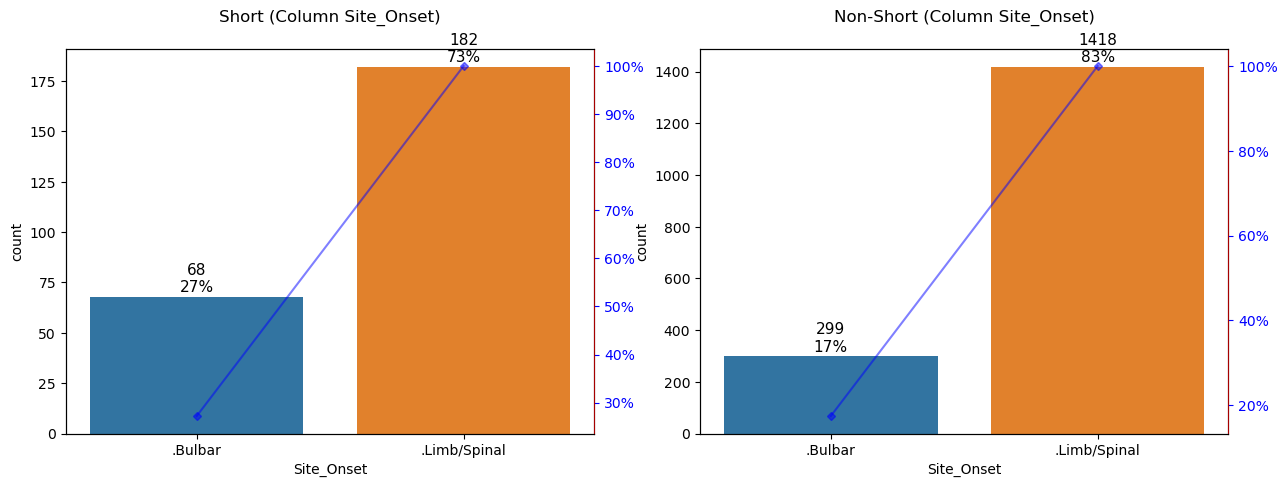

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
1       Bulbar         68.0      27.20%            299.0          17.41%
0  Limb/Spinal        182.0      72.80%           1418.0          82.59%

Column Diagnosis_Delay     (DataType: object)


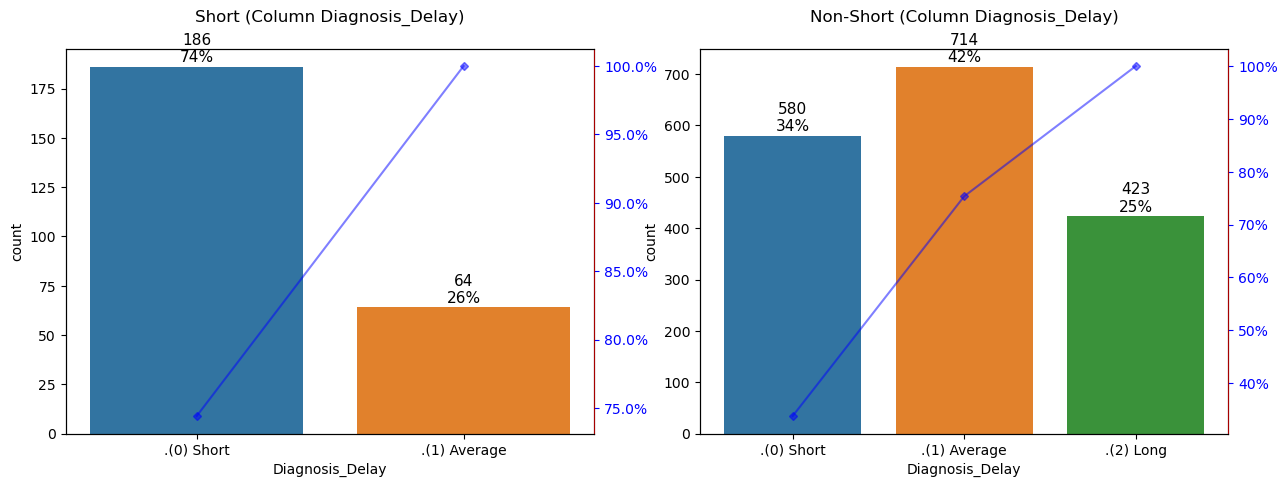

          Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0.0    (0) Short        186.0      74.40%            580.0          33.78%
1.0  (1) Average         64.0      25.60%            714.0          41.58%
NaN     (2) Long          NaN         NaN            423.0          24.64%

Column Age_at_Onset     (DataType: object)


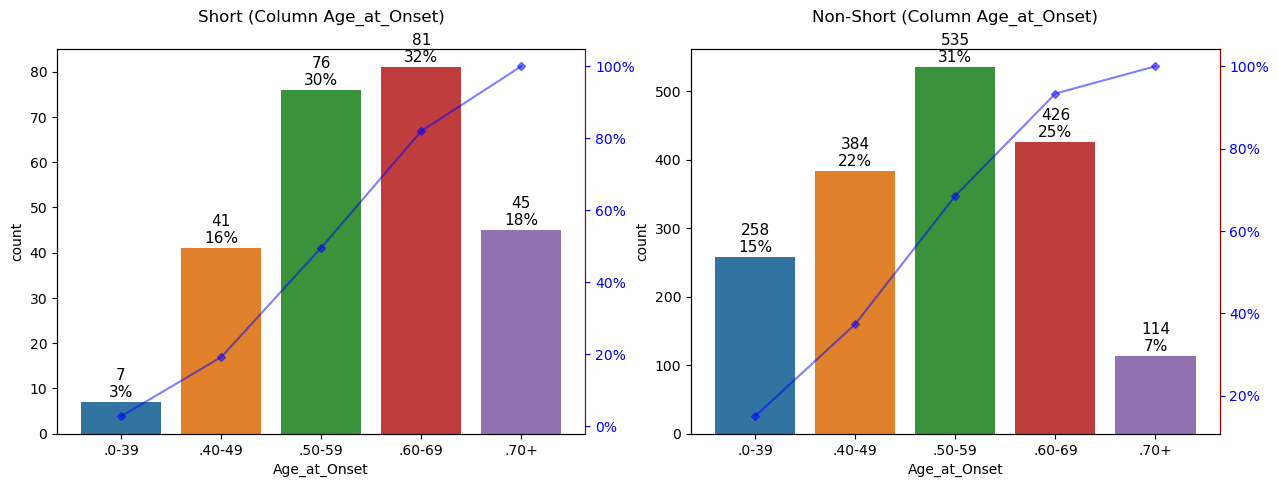

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
4   0-39          7.0       2.80%            258.0          15.03%
3  40-49         41.0      16.40%            384.0          22.36%
1  50-59         76.0      30.40%            535.0          31.16%
0  60-69         81.0      32.40%            426.0          24.81%
2    70+         45.0      18.00%            114.0           6.64%

Column Riluzole     (DataType: object)


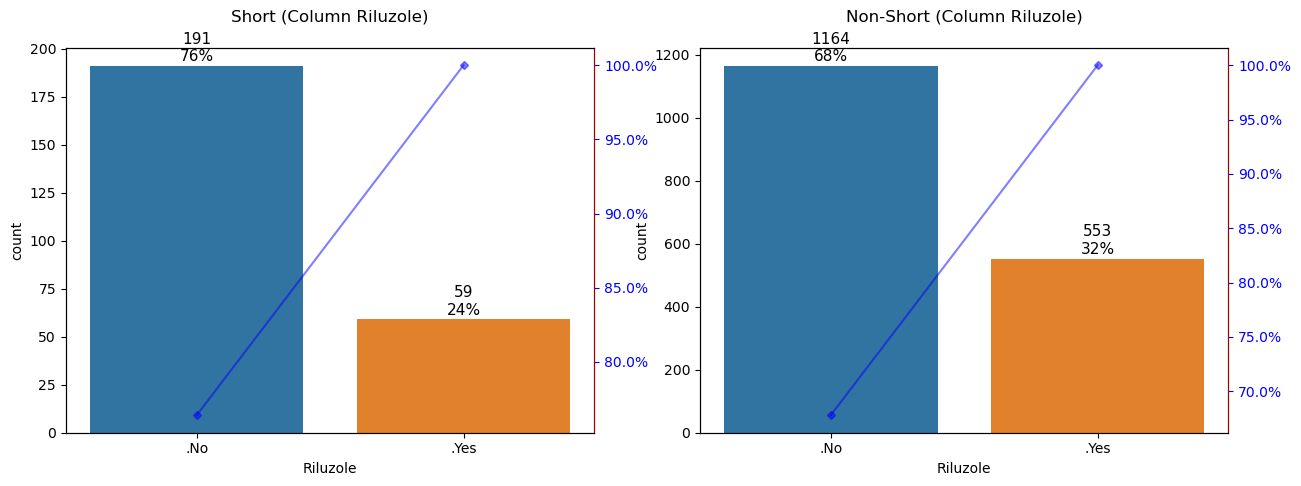

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     No        191.0      76.40%           1164.0          67.79%
1    Yes         59.0      23.60%            553.0          32.21%

Column FVC_at_Diagnosis     (DataType: object)


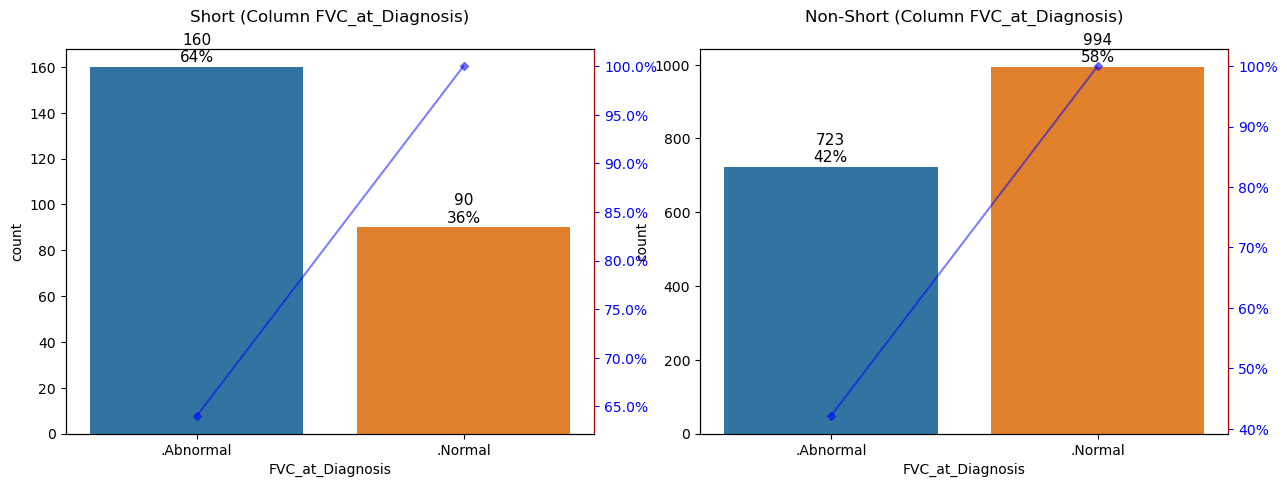

     Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0  Abnormal        160.0      64.00%            723.0          42.11%
1    Normal         90.0      36.00%            994.0          57.89%

Column BMI_at_Diagnosis     (DataType: object)


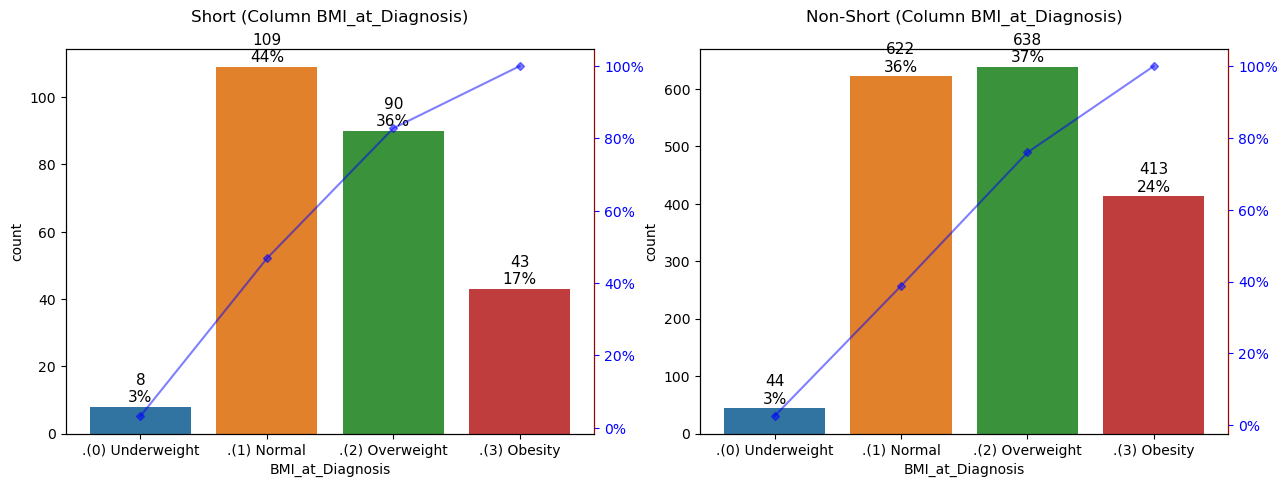

            Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
3  (0) Underweight          8.0       3.20%             44.0           2.56%
0       (1) Normal        109.0      43.60%            622.0          36.23%
1   (2) Overweight         90.0      36.00%            638.0          37.16%
2      (3) Obesity         43.0      17.20%            413.0          24.05%

Column Q1_Speech_slope_at_Diagnosis     (DataType: object)


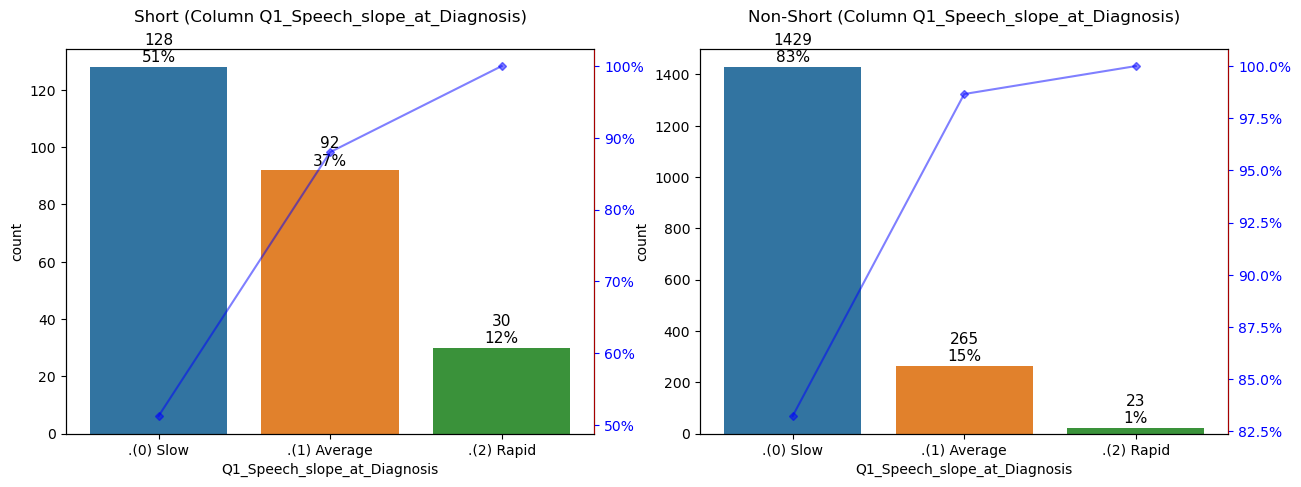

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     (0) Slow        128.0      51.20%           1429.0          83.23%
1  (1) Average         92.0      36.80%            265.0          15.43%
2    (2) Rapid         30.0      12.00%             23.0           1.34%

Column Q2_Salivation_slope_at_Diagnosis     (DataType: object)


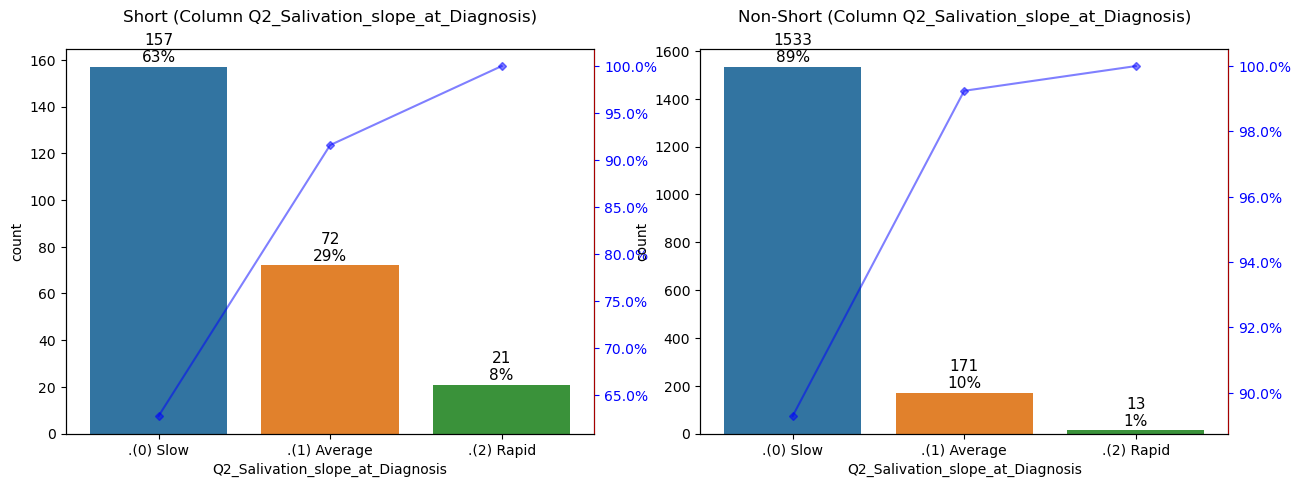

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     (0) Slow        157.0      62.80%           1533.0          89.28%
1  (1) Average         72.0      28.80%            171.0           9.96%
2    (2) Rapid         21.0       8.40%             13.0           0.76%

Column Q3_Swallowing_slope_at_Diagnosis     (DataType: object)


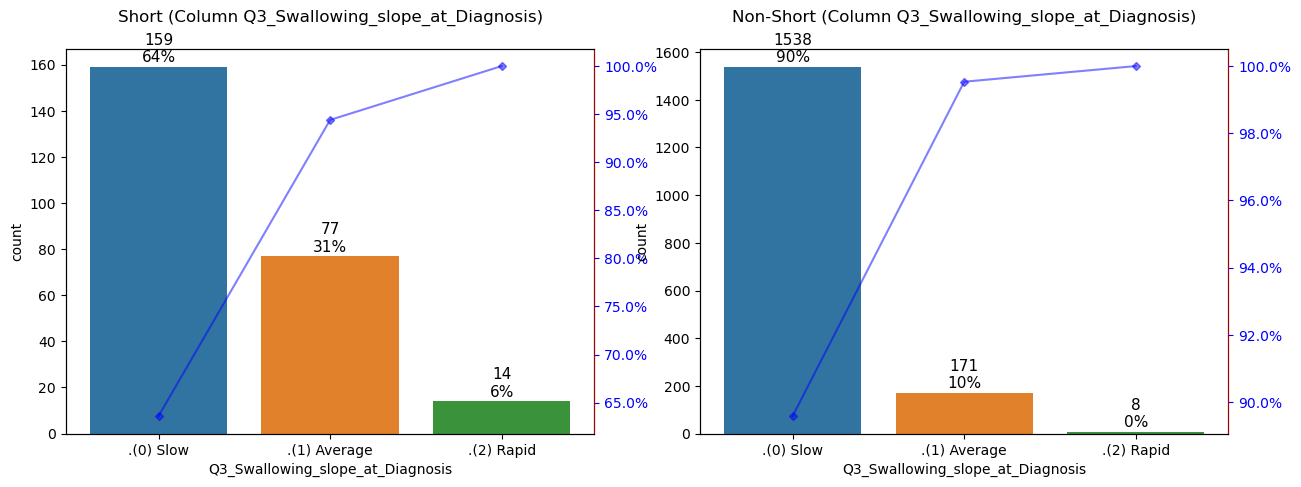

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     (0) Slow        159.0      63.60%           1538.0          89.57%
1  (1) Average         77.0      30.80%            171.0           9.96%
2    (2) Rapid         14.0       5.60%              8.0           0.47%

Column Q4_Handwriting_slope_at_Diagnosis     (DataType: object)


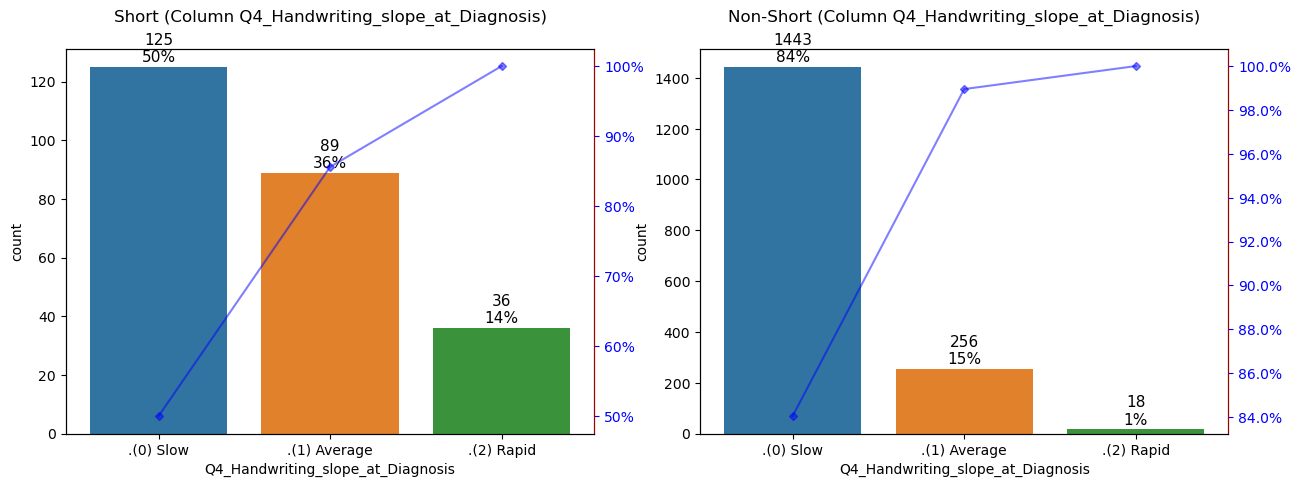

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     (0) Slow        125.0      50.00%           1443.0          84.04%
1  (1) Average         89.0      35.60%            256.0          14.91%
2    (2) Rapid         36.0      14.40%             18.0           1.05%

Column Q5_Cutting_slope_at_Diagnosis     (DataType: object)


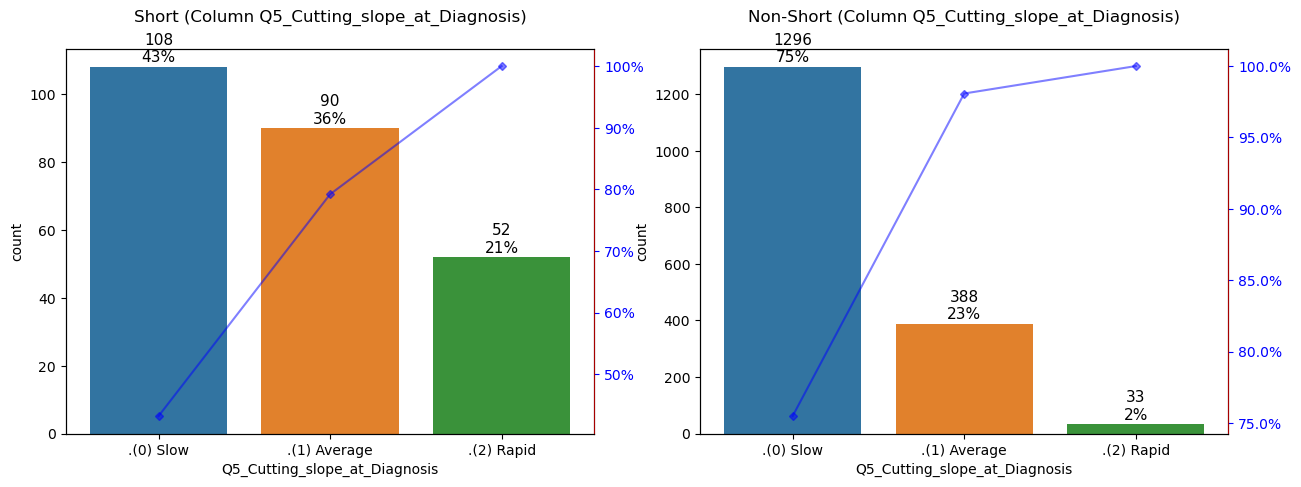

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     (0) Slow        108.0      43.20%           1296.0          75.48%
1  (1) Average         90.0      36.00%            388.0          22.60%
2    (2) Rapid         52.0      20.80%             33.0           1.92%

Column Q6_Dressing_and_Hygiene_slope_at_Diagnosis     (DataType: object)


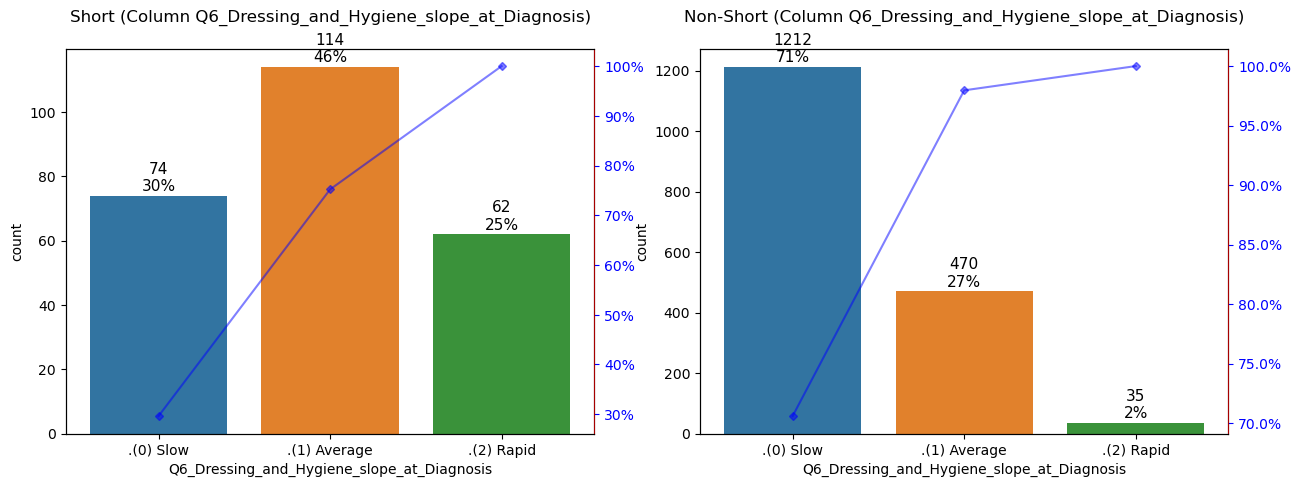

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
1     (0) Slow         74.0      29.60%           1212.0          70.59%
0  (1) Average        114.0      45.60%            470.0          27.37%
2    (2) Rapid         62.0      24.80%             35.0           2.04%

Column Q7_Turning_in_Bed_slope_at_Diagnosis     (DataType: object)


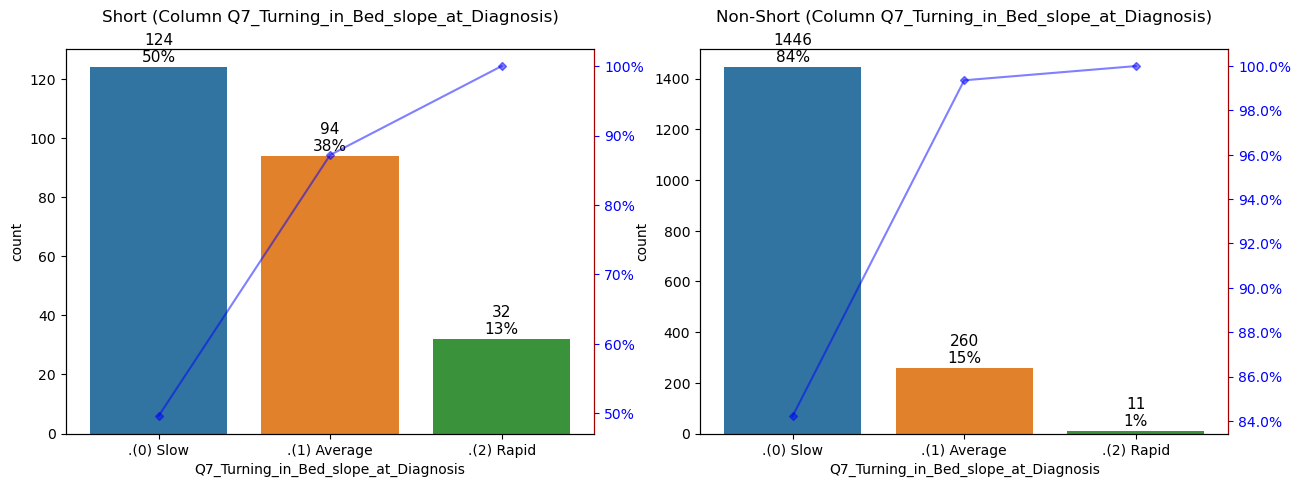

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     (0) Slow        124.0      49.60%           1446.0          84.22%
1  (1) Average         94.0      37.60%            260.0          15.14%
2    (2) Rapid         32.0      12.80%             11.0           0.64%

Column Q8_Walking_slope_at_Diagnosis     (DataType: object)


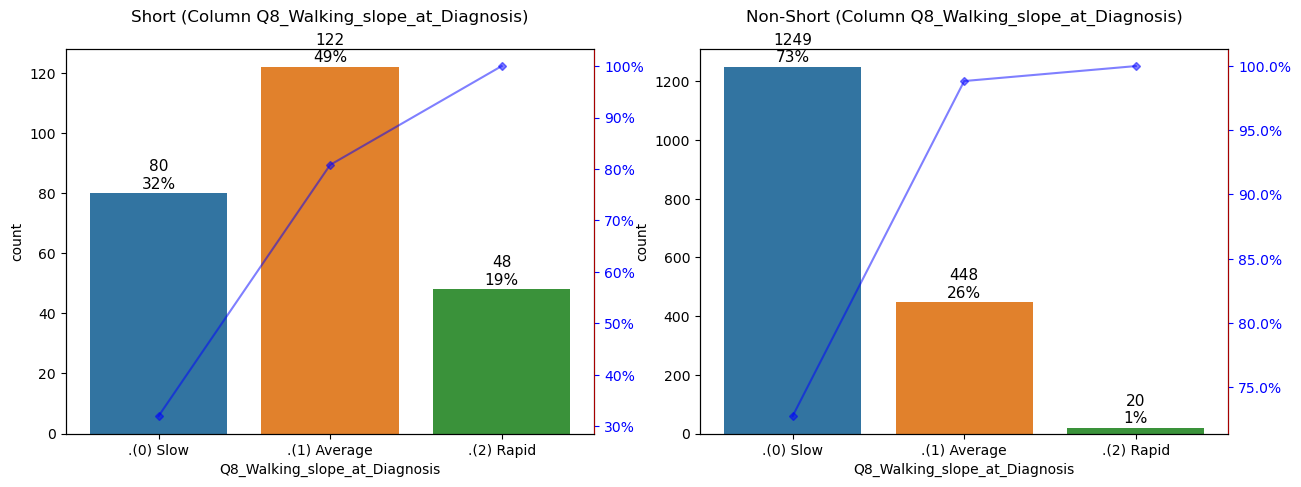

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
1     (0) Slow         80.0      32.00%           1249.0          72.74%
0  (1) Average        122.0      48.80%            448.0          26.09%
2    (2) Rapid         48.0      19.20%             20.0           1.16%

Column Q9_Climbing_Stairs_slope_at_Diagnosis     (DataType: object)


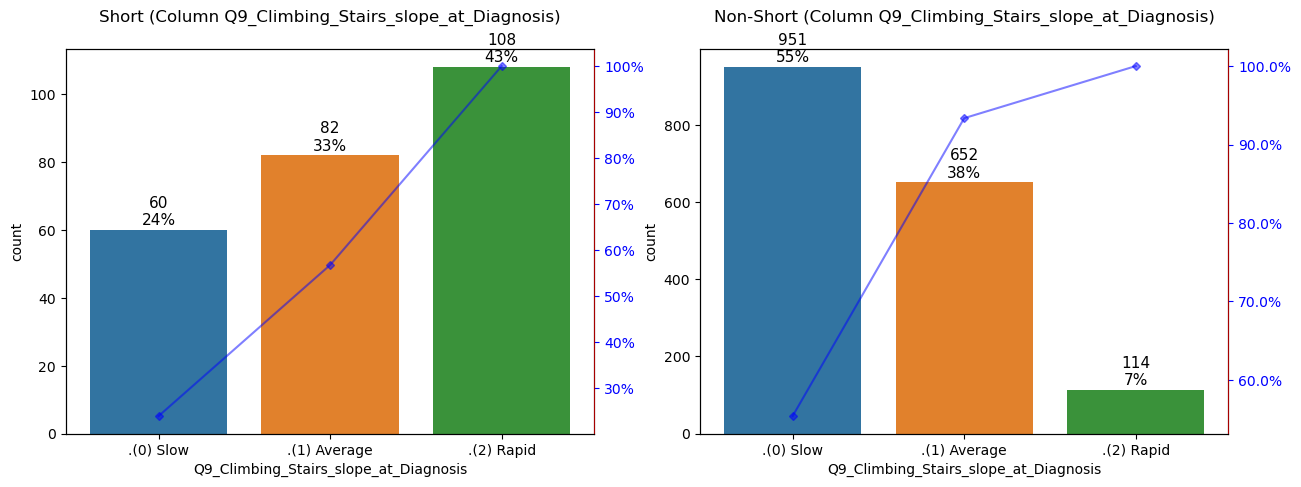

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
2     (0) Slow         60.0      24.00%            951.0          55.39%
1  (1) Average         82.0      32.80%            652.0          37.97%
0    (2) Rapid        108.0      43.20%            114.0           6.64%

Column Q10_Respiratory_slope_at_Diagnosis     (DataType: object)


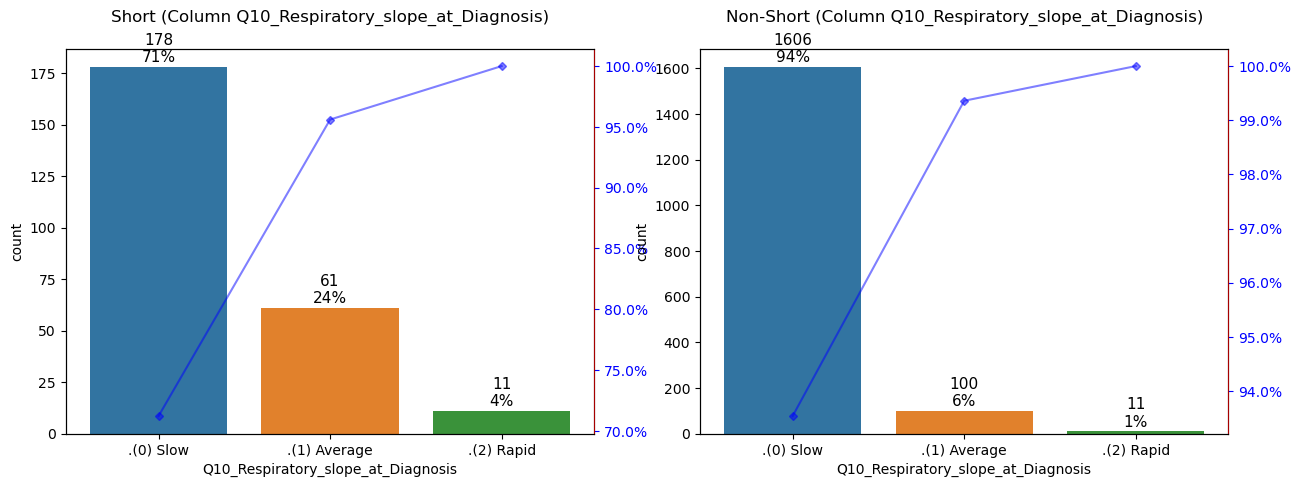

        Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     (0) Slow        178.0      71.20%           1606.0          93.54%
1  (1) Average         61.0      24.40%            100.0           5.82%
2    (2) Rapid         11.0       4.40%             11.0           0.64%

Column Qty_Regions_Involved_at_Diagnosis     (DataType: object)


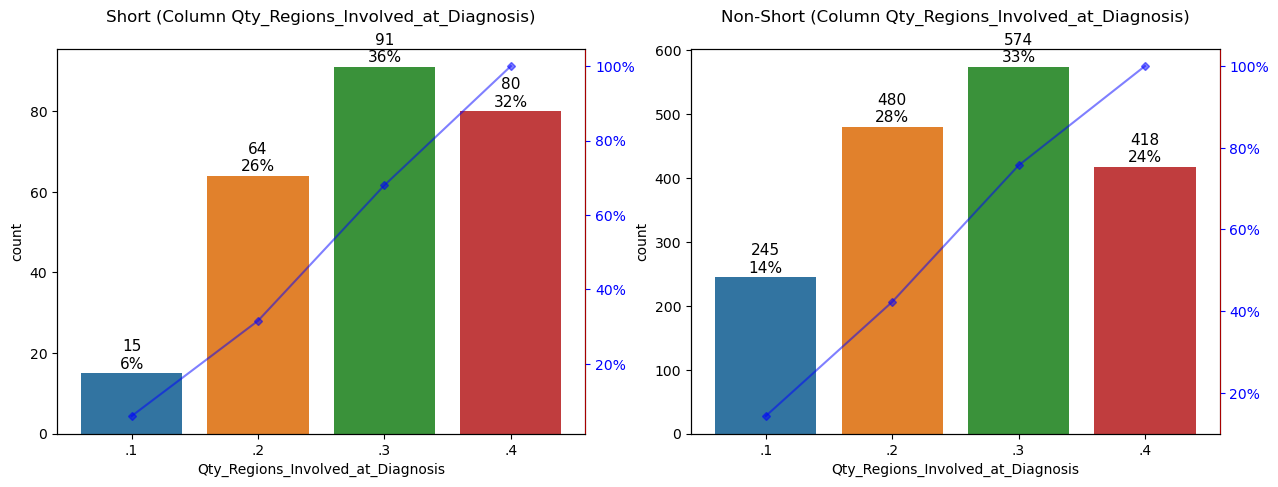

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
3      1         15.0       6.00%            245.0          14.27%
2      2         64.0      25.60%            480.0          27.96%
0      3         91.0      36.40%            574.0          33.43%
1      4         80.0      32.00%            418.0          24.34%

Column Region_Involved_Bulbar_at_Diagnosis     (DataType: object)


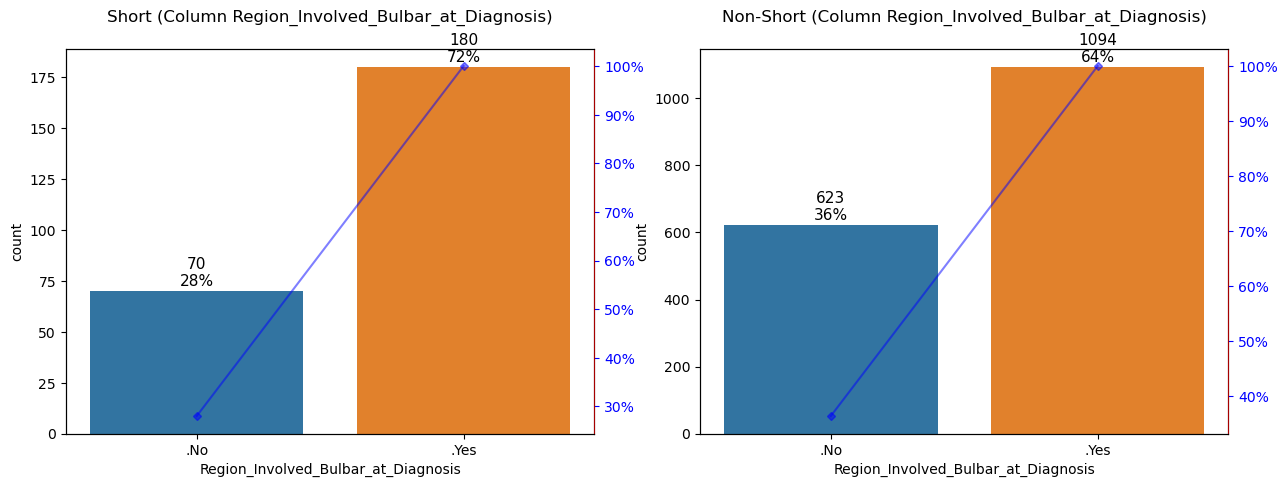

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
1     No         70.0      28.00%            623.0          36.28%
0    Yes        180.0      72.00%           1094.0          63.72%

Column Region_Involved_Upper_Limb_at_Diagnosis     (DataType: object)


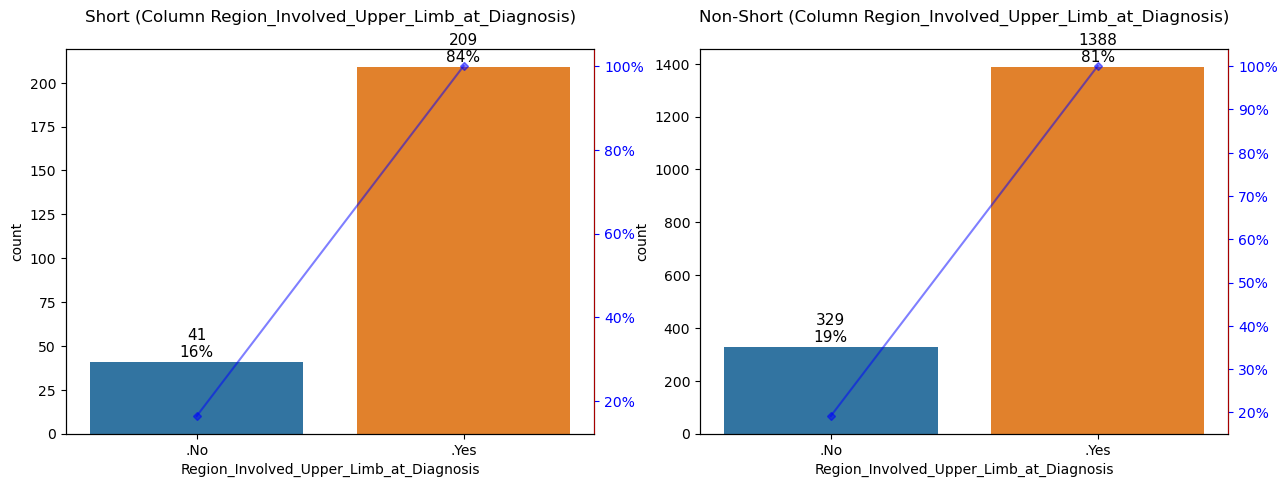

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
1     No         41.0      16.40%            329.0          19.16%
0    Yes        209.0      83.60%           1388.0          80.84%

Column Region_Involved_Lower_Limb_at_Diagnosis     (DataType: object)


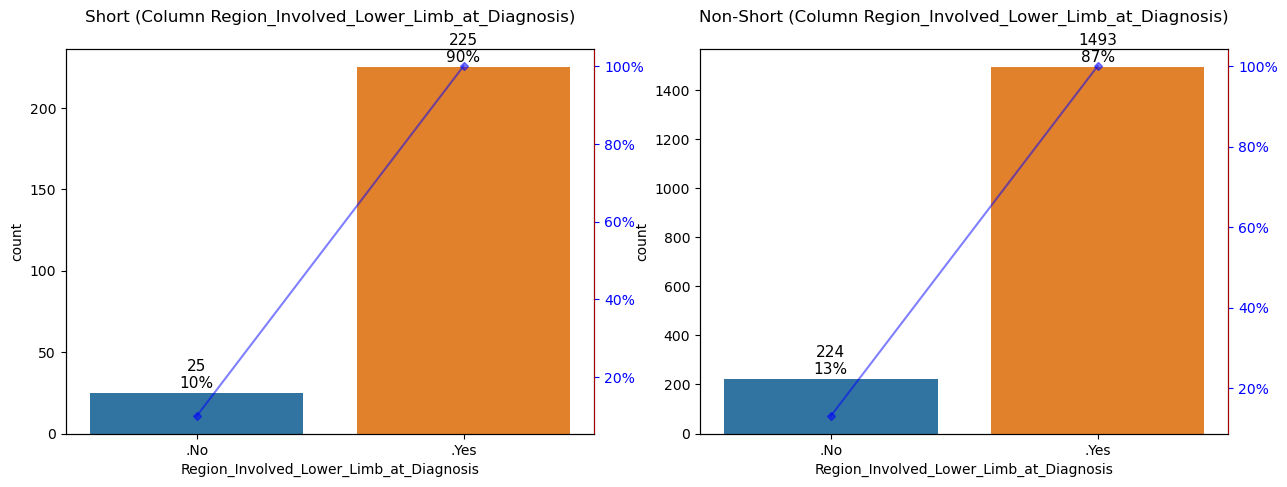

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
1     No         25.0      10.00%            224.0          13.05%
0    Yes        225.0      90.00%           1493.0          86.95%

Column Region_Involved_Respiratory_at_Diagnosis     (DataType: object)


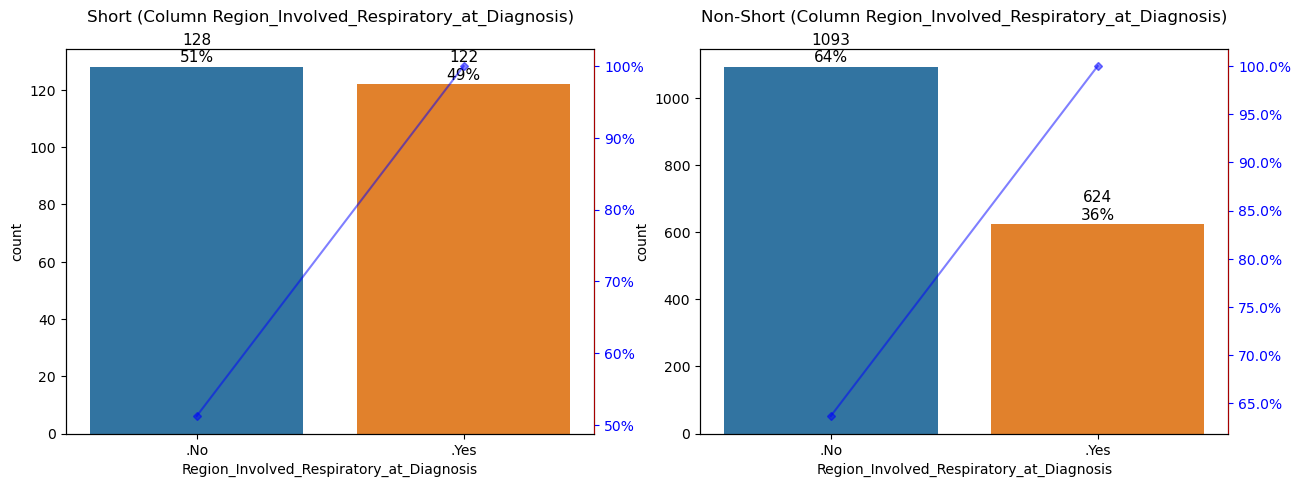

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     No        128.0      51.20%           1093.0          63.66%
1    Yes        122.0      48.80%            624.0          36.34%

Column Patient_with_Gastrostomy_at_Diagnosis     (DataType: object)


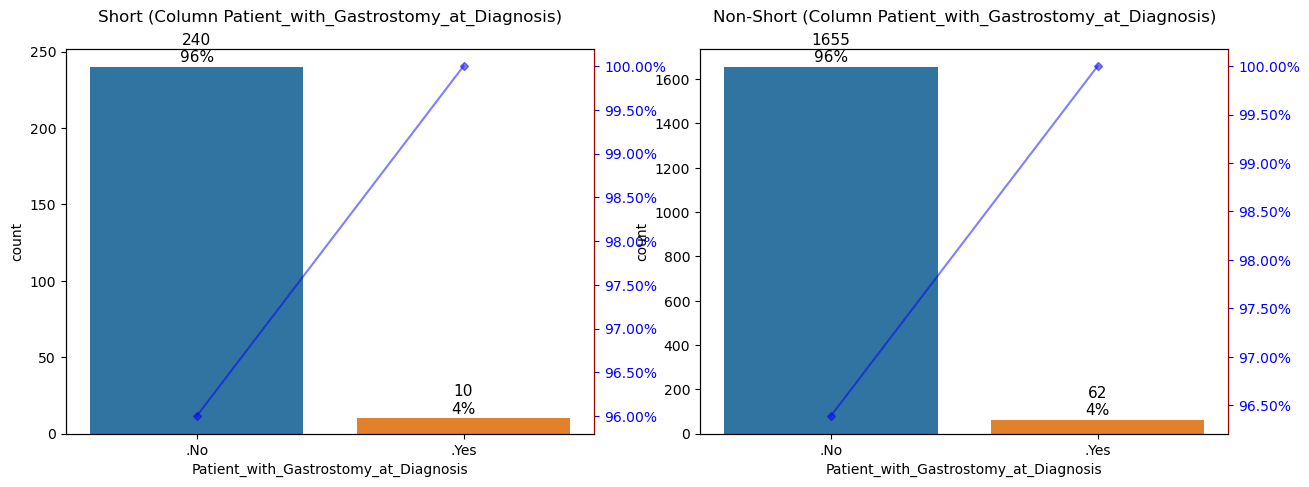

  Values  Short_Count Short_Perc.  Non-Short_Count Non-Short_Perc.
0     No        240.0      96.00%           1655.0          96.39%
1    Yes         10.0       4.00%             62.0           3.61%



In [138]:
df_short = df_temp.loc[(df_temp.Survival_Group == 'Short')].copy()

df_non_short = df_temp.loc[(df_temp.Survival_Group == 'Non-Short')].copy()

cols = df_temp.columns

for c in cols:
    if c != 'Survival_Group':
        
        utils.plot_grouped_variable_distribution(
            series_1=df_short[c],
            title_group_1='Short',
            series_2=df_non_short[c],
            title_group_2='Non-Short',
        )